# HEPATITIS DISEASE DIAGNOSIS

# PROBLEM STATEMENT:

To predict and analyze Hepatitis C Disease from the dataset based on factors like Albumin Blood Test,Alkaline phosphates, 
Gamma-Glutamyl Transferase, Proteins and etc.

# OBJECTIVE:

Hepatitis is an inflammation of the liver, most commonly caused by a viral infection.The data set contains laboratory values of 
blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning
Repository.

- To analyze which gender of population is affected more by the disease

- To find which age group of the population is affected at maximum by the disease

- To detect in which category most of the population affected by the disease belong to

- To discover the factor in which Protein is correlated with the factor ALB

- To know the number of people affected by each category

- To find the average of patients through Crea test levels.

- To detect the test levels in ALB,ALP,ALT,AST tests  to diagnosis in each age group .

- To know the test levels in BIL,CHE,CHOL,GGT tests to diagnosis in each age group.

- To discover whether the factor Bilirubin is correlated with the factor ALB.

### Columns Abbreviation
ALB-Albumin Blood Test

ALP-Alkaline phosphatase

ALT-Alanine Transaminase

AST-Aspartate Transaminase

BIL-Bilirubin

CHE-Acetylcholinesterase

CHOL-Cholesterol

CREA-Creatinine

GGT-Gamma-Glutamyl Transferase

PROT-Proteins

# Importing the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

# Data Collection

In [2]:
data = pd.read_csv("HepatitisCdata.csv")
data

Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.17  4.80   74.0   15.6  76.5  
2     8.84  5.20   86.0   33.2  79.3  
3     7.33  4.74   80.0   33.8  75.7  
4     9.15  4.32   76.0   29.9  68.7  
..     ...   ...    ...    ...   ...  
610   5.57  6.30   55.7  650.9  68.5  
611   1.54  3.02   63.0   35.9  71.3  
612   1.66  3.63   66.7   64.2  82.0  
613   3.56  4.20   52.0   50.0  71.0  
614   9.07  5.30   67.0   34.0  68.0  

[615 rows x 14 columns]

In [3]:
#Renaming "Unnamed: 0" column to "Id"
data.rename(
    columns=({'Unnamed: 0': 'Patient_ID'}),
    inplace=True,
)

In [4]:
data.head()

Patient_ID       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [5]:
data.tail()

Patient_ID     Category  Age Sex   ALB    ALP    ALT    AST   BIL   CHE  \
610         611  3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0  5.57   
611         612  3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0  1.54   
612         613  3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0  1.66   
613         614  3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0  3.56   
614         615  3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0  9.07   

     CHOL  CREA    GGT  PROT  
610  6.30  55.7  650.9  68.5  
611  3.02  63.0   35.9  71.3  
612  3.63  66.7   64.2  82.0  
613  4.20  52.0   50.0  71.0  
614  5.30  67.0   34.0  68.0

In [6]:
data.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

# Data Cleaning

In [7]:
# Finding the shape of the dataset
data.shape

(615, 14)

In [8]:
# checking whether NA value are present or not for each column.
isna_value = data.isna()
isna_value

Patient_ID  Category    Age    Sex    ALB    ALP    ALT    AST    BIL  \
0         False     False  False  False  False  False  False  False  False   
1         False     False  False  False  False  False  False  False  False   
2         False     False  False  False  False  False  False  False  False   
3         False     False  False  False  False  False  False  False  False   
4         False     False  False  False  False  False  False  False  False   
..          ...       ...    ...    ...    ...    ...    ...    ...    ...   
610       False     False  False  False  False  False  False  False  False   
611       False     False  False  False  False  False  False  False  False   
612       False     False  False  False  False  False  False  False  False   
613       False     False  False  False  False   True  False  False  False   
614       False     False  False  False  False   True  False  False  False   

       CHE   CHOL   CREA    GGT   PROT  
0    False  False  False  False  False  
1    False  False  False  False  False  
2    False  False  False  False  False  
3    False  False  False  False  False  
4    False  False  False  False  False  
..     ...    ...    ...    ...    ...  
610  False  False  False  False  False  
611  False  False  False  False  False  
612  False  False  False  False  False  
613  False  False  False  False  False  
614  False  False  False  False  False  

[615 rows x 14 columns]

In [9]:
# checking whether NA value are present or not for the whole dataset.
print(data.isnull().values.any())

True


In [10]:
# Count NA values present in each columns.
print(data.isnull().sum())

Patient_ID     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [11]:
# Total count of NA values present in the entire dataset
print(data.isnull().sum().sum())

31


In [12]:
# Replacing the NA values in mean of 'ALB' column
mean_ALB = data['ALB'].mean()
data['ALB'].fillna(mean_ALB,inplace=True)

In [13]:
# Replacing the NA values in mean of 'ALP' column
mean_ALP = data['ALP'].mean()
data['ALP'].fillna(mean_ALP,inplace=True)

In [14]:
# Replacing the NA values in mean of 'ALT' column
mean_ALT = data['ALT'].mean()
data['ALT'].fillna(mean_ALT,inplace=True)

In [15]:
# Replacing the NA values in mean of 'CHOL' column
mean_CHOL = data['CHOL'].mean()
data['CHOL'].fillna(mean_CHOL,inplace=True)

In [16]:
# Replacing the NA values in mean of 'PROT' column
mean_PROT = data['PROT'].mean()
data['PROT'].fillna(mean_PROT,inplace=True)

In [17]:
# Count NA values present in each columns from the updated dataset.
print(data.isnull().sum())

Patient_ID    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


In [18]:
# Count NA values present in 'ALP' column from the updated dataset.
data["ALP"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
610    False
611    False
612    False
613    False
614    False
Name: ALP, Length: 615, dtype: bool

# Data Understanding

In [19]:
# Detailed info about the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [20]:
# Finding the unique Values in the Category column.
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [21]:
# Finding the unique Values in the Sex column.
data['Sex'].unique()

array(['m', 'f'], dtype=object)

In [22]:
# Finding the unique Values in the Age column.
data['Age'].unique()

array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 70, 71, 76, 77, 74, 19, 23, 25, 27, 29, 30, 75],
      dtype=int64)

In [23]:
# Satistical Describtion of the Hepatitis-C data.
data.describe()

Patient_ID         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.775920   25.643955   25.448940   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.950000   16.400000   21.600000   
50%    308.000000   47.000000   41.900000   66.700000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   79.300000   33.050000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  615.000000   615.000000  615.000000  615.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.205657    1.123466    49.756166   54.661071    5.398234  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.620000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.310000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.055000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

In [24]:
# Satistical Describtion for non-numerical data.
data.describe(exclude='number')

Category  Sex
count             615  615
unique              5    2
top     0=Blood Donor    m
freq              533  377

In [25]:
# Datatypes of each column.
data.dtypes

Patient_ID      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [26]:
# Total Length of the rows present in the dataset.
len(data)

615

In [27]:
# Name of the columns present in the dataset.
data.columns

Index(['Patient_ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [28]:
# Total Length of the columns present in the dataset.
len(data.columns)

14

In [29]:
# Maximum value of each column
data[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']].max()

Age       77.00
ALB       82.20
ALP      416.60
ALT      325.30
AST      324.00
BIL      254.00
CHE       16.41
CHOL       9.67
CREA    1079.10
GGT      650.90
PROT      90.00
dtype: float64

In [30]:
# Minimum value of each column
data[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']].min()

Age     19.00
ALB     14.90
ALP     11.30
ALT      0.90
AST     10.60
BIL      0.80
CHE      1.42
CHOL     1.43
CREA     8.00
GGT      4.50
PROT    44.80
dtype: float64

In [31]:
# Average value of each column
data[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']].mean()

Age     47.408130
ALB     41.620195
ALP     68.283920
ALT     28.450814
AST     34.786341
BIL     11.396748
CHE      8.196634
CHOL     5.368099
CREA    81.287805
GGT     39.533171
PROT    72.044137
dtype: float64

## Feature Extraction

In [32]:
# Dropping the 'Patient_ID' column from the dataset
New_data = data.drop('Patient_ID', axis = 1)

In [33]:
# Replacing the 'Category' values with 0 or 1
New_data['Category'].loc[New_data['Category'].isin(['0=Blood Donor', '0s=suspect Blood Donor'])] = 0
New_data['Category'].loc[New_data['Category'].isin(['1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'])] = 1

# Replacing 'Sex' column with male as 1 and Female as 2
New_data['Sex'] = New_data['Sex'].map({'m': 1, 'f': 2})

C:\Users\shamritha\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
New_data.head()

Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0        0   32    1  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1        0   32    1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2        0   32    1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3        0   32    1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4        0   32    1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

In [35]:
# Converting the 'category' column as Integer
New_data['Category'] = New_data['Category'].astype(int)

In [36]:
New_data.head(2)

Category  Age  Sex   ALB   ALP   ALT   AST  BIL    CHE  CHOL   CREA   GGT  \
0         0   32    1  38.5  52.5   7.7  22.1  7.5   6.93  3.23  106.0  12.1   
1         0   32    1  38.5  70.3  18.0  24.7  3.9  11.17  4.80   74.0  15.6   

   PROT  
0  69.0  
1  76.5

## Extracting Independent and dependent Variable

In [37]:
X = New_data.drop(['Category'], axis = 1)
X.head(3)

Age  Sex   ALB   ALP   ALT   AST  BIL    CHE  CHOL   CREA   GGT  PROT
0   32    1  38.5  52.5   7.7  22.1  7.5   6.93  3.23  106.0  12.1  69.0
1   32    1  38.5  70.3  18.0  24.7  3.9  11.17  4.80   74.0  15.6  76.5
2   32    1  46.9  74.7  36.2  52.6  6.1   8.84  5.20   86.0  33.2  79.3

In [38]:
y = New_data['Category']
y.head(3)

0    0
1    0
2    0
Name: Category, dtype: int32

## Splitting The Data into Training and Testing datasets

- Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. 
- Hence, the Category will be the y label and rest of the data will be the X or the input data.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Splitting the Data into 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((430, 12), (185, 12))

In [41]:
len(X_train), len(X_test)

(430, 185)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [43]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test Result

In [44]:
y_pred_lr = lr.predict(X_test) 

In [45]:
from sklearn.metrics import accuracy_score

LogisticRegressionScore1 = accuracy_score(y_test,y_pred_lr)
print("Accuracy obtained by Logistic Regression model for testing data :", LogisticRegressionScore1*100)

Accuracy obtained by Logistic Regression model for testing data : 89.72972972972974


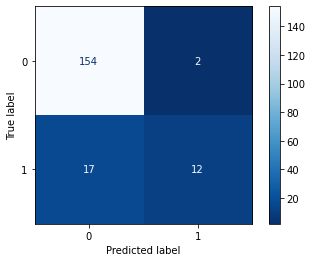

In [46]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(lr, X_test, y_test,cmap="Blues_r")  
plt.show()

## Comparing Y-test and Predicted Value

In [47]:
pd.DataFrame({'y_test':y_test,'y_pred ':y_pred_lr })

y_test  y_pred 
248       0        0
365       0        0
432       0        0
610       1        0
132       0        0
..      ...      ...
18        0        0
478       0        0
333       0        0
144       0        0
414       0        0

[185 rows x 2 columns]

## Classification Report For Logistic Regression

In [48]:
# Having a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       156
           1       0.86      0.41      0.56        29

    accuracy                           0.90       185
   macro avg       0.88      0.70      0.75       185
weighted avg       0.89      0.90      0.88       185



In [49]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
logi_precision = precision_score(y_test,y_pred_lr)
logi_recall  = recall_score(y_test,y_pred_lr)
logi_f1 = f1_score(y_test,y_pred_lr)
print('Presision Score for Logistic Regression',logi_precision)
print('Recall Score for Logistic Regression',logi_recall)
print('F1 Score for Logistic Regression',logi_f1)

Presision Score for Logistic Regression 0.8571428571428571
Recall Score for Logistic Regression 0.41379310344827586
F1 Score for Logistic Regression 0.5581395348837208


# Random Forest Model 

- Fitting Random Forest Classifier to the training set  

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=7,
                                       n_estimators=100, oob_score=True, criterion='entropy')

In [52]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 193 ms


RandomForestClassifier(criterion='entropy', max_depth=7, n_jobs=-1,
                       oob_score=True, random_state=42)

## Predicting the Test Set result

In [53]:
y_pred_rfc = classifier_rf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

RandomForestClassifierScore1 = accuracy_score(y_test,y_pred_rfc)
print("Accuracy obtained by Random Forest Classifier for testing data :", RandomForestClassifierScore1*100)

Accuracy obtained by Random Forest Classifier for testing data : 95.67567567567568


## Ploting The Confusion Matrix of Random Forest Classifier

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(classifier_rf, X_test, y_test,cmap="BuPu_r")  
plt.show()

## Comparing Y-test and Predicted Value

In [56]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rfc})

Actual Value  Predicted Value
248             0                0
365             0                0
432             0                0
610             1                1
132             0                0
..            ...              ...
18              0                0
478             0                0
333             0                0
144             0                0
414             0                0

[185 rows x 2 columns]

In [57]:
np.array(y_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [58]:
y_pred_rfc

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

## Classification Report for Random Forest Classifier 

- Having a look at the classification report of Random Forest Classifier

In [59]:
from sklearn import metrics

In [60]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       156
           1       1.00      0.72      0.84        29

    accuracy                           0.96       185
   macro avg       0.98      0.86      0.91       185
weighted avg       0.96      0.96      0.95       185



In [61]:
from sklearn.metrics import precision_score,recall_score,f1_score
rand_precision = precision_score(y_test,y_pred_rfc)
rand_recall = recall_score(y_test,y_pred_rfc)
rand_f1 = f1_score(y_test,y_pred_rfc)
print('Presision Score for Random Forest Classifier',rand_precision)
print('Recall Score for Random Forest Classifier',rand_recall)
print('F1 Score for Random Forest Classifier',rand_f1)

Presision Score for Random Forest Classifier 1.0
Recall Score for Random Forest Classifier 0.7241379310344828
F1 Score for Random Forest Classifier 0.8400000000000001


## Tree Plot for Random Forest Classifier

- Visualizing the single Decision Tree from the Random Forest

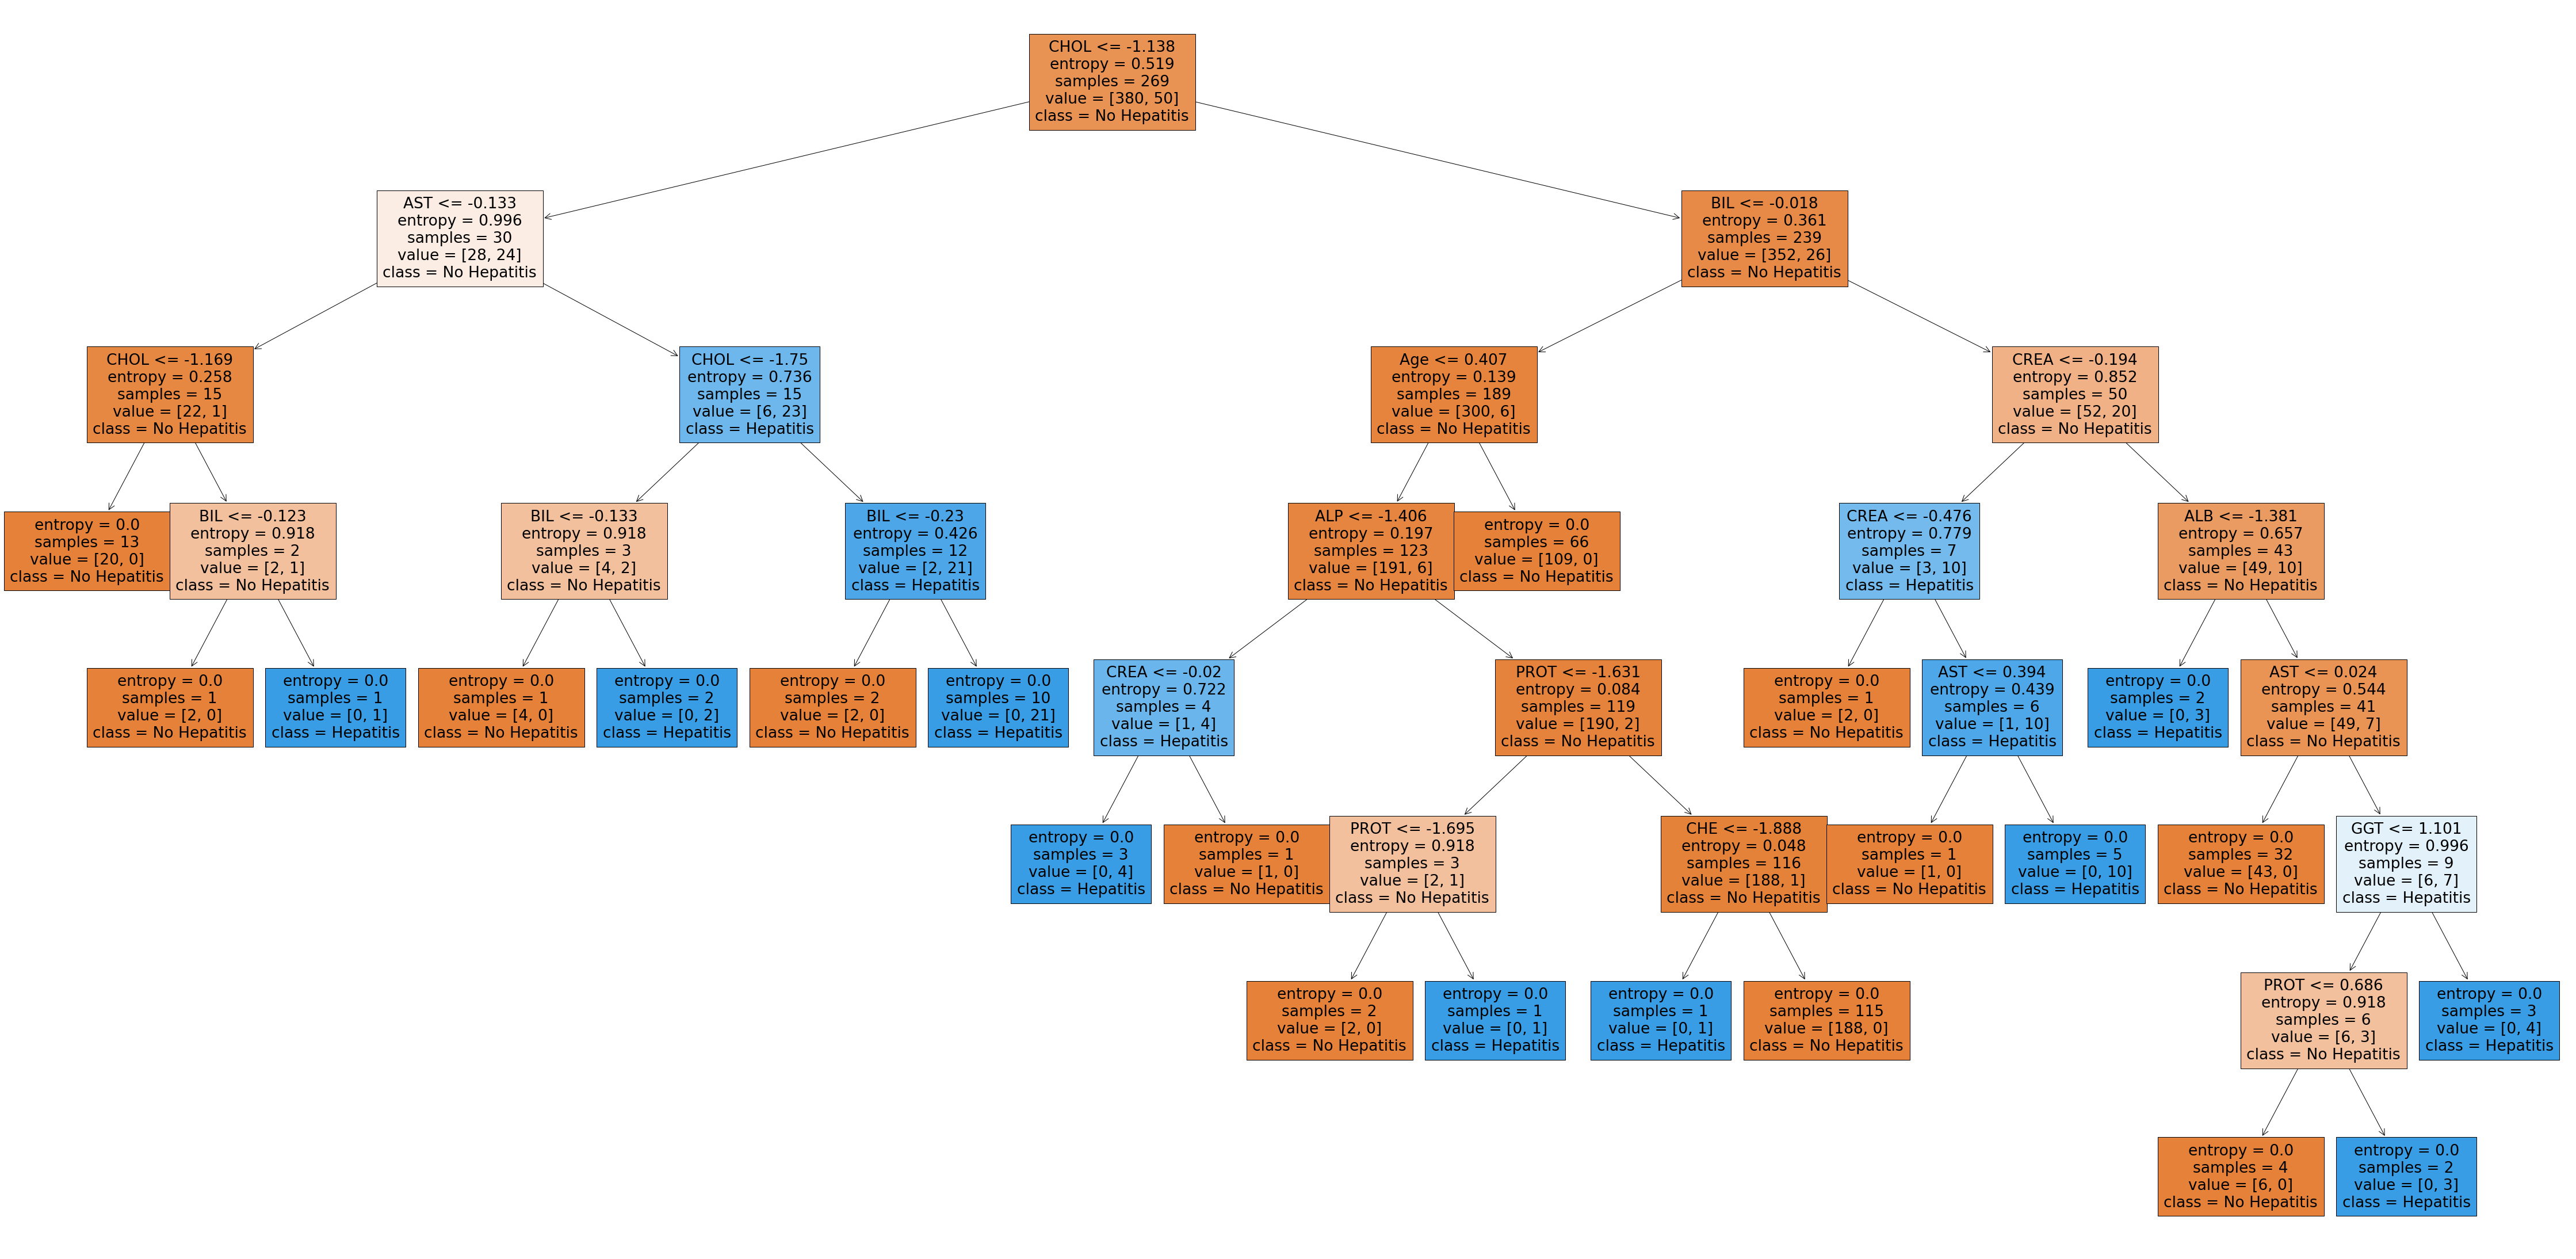

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(classifier_rf.estimators_[0], feature_names = X.columns,class_names=['No Hepatitis', "Hepatitis"],filled=True);

# Ada Boost

In [63]:
# Importing neccesary packages
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [64]:
# Create adaboost classifer object
AdaModel = AdaBoostClassifier(n_estimators=100, learning_rate=1)

In [65]:
# Train Adaboost Classifer
AdaModel.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

## Predicting the Test Result

In [66]:
#Predict the response for test dataset
y_pred_adBt = AdaModel.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
adaboostscore1 = metrics.accuracy_score(y_test, y_pred_adBt)
print("Accuracy obtained by Ada Boost model:",adaboostscore1*100.0)

Accuracy obtained by Ada Boost model: 98.37837837837839


In [68]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [69]:
# Train Adaboost Classifer
abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adBt1 = abc.predict(X_test)

In [70]:
# Model Accuracy, how often is the classifier correct?
adaboostscore2 = metrics.accuracy_score(y_test, y_pred_adBt1)
print("Accuracy obtained by Ada Boost model: ", adaboostscore2*100.0)

Accuracy obtained by Ada Boost model:  84.86486486486487


## Ploting The Confusion Matrix of Ada Boost

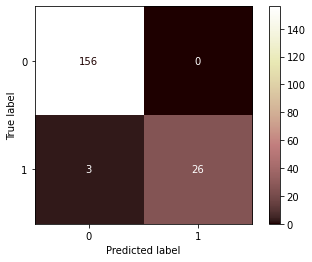

In [71]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(AdaModel, X_test, y_test,cmap="pink")  
plt.show()

## Comparing Y-test and Predicted Value

In [72]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_adBt})

Actual Value  Predicted Value
248             0                0
365             0                0
432             0                0
610             1                1
132             0                0
..            ...              ...
18              0                0
478             0                0
333             0                0
144             0                0
414             0                0

[185 rows x 2 columns]

In [73]:
np.array(y_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [74]:
y_pred_adBt

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

## Classification Report for Ada Boost
- Having a look at the classification report of Ada Boost

In [75]:
from sklearn import metrics

In [76]:
print(metrics.classification_report(y_test, y_pred_adBt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       156
           1       1.00      0.90      0.95        29

    accuracy                           0.98       185
   macro avg       0.99      0.95      0.97       185
weighted avg       0.98      0.98      0.98       185



In [77]:
from sklearn.metrics import precision_score,recall_score,f1_score

ada_precision = precision_score(y_test,y_pred_adBt)
ada_recall = recall_score(y_test,y_pred_adBt)
ada_f1 = f1_score(y_test,y_pred_adBt)
print('Presision Score for Ada Boost',ada_precision)
print('Recall Score for Ada Boost',ada_recall)
print('F1 Score for Ada Boost',ada_f1)

Presision Score for Ada Boost 1.0
Recall Score for Ada Boost 0.896551724137931
F1 Score for Ada Boost 0.9454545454545454


# XG Boost

In [78]:
! pip install xgboost

In [79]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn import preprocessing
import time
import warnings
warnings.filterwarnings("ignore")

In [80]:
start = time.time()
xgbr = xgb.XGBClassifier(max_depth = 5,n_estimators = 100, random_state=42)

In [81]:
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

[14:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Finding the accurancy of the model

In [82]:
xgboostscore1 = accuracy_score(y_test, y_pred_xgbr)

In [83]:
start_time = time.time()
print("Accuracy obtained by XG Boost model: %.2f%%" % (xgboostscore1 * 100.0))
print("%s seconds " % (time.time() - start_time))
end = time.time()
diff = end - start
print('Execution time:', diff)

Accuracy obtained by XG Boost model: 98.38%
0.0012924671173095703 seconds 
Execution time: 1.029021978378296


## Ploting The Confusion Matrix of XG Boost

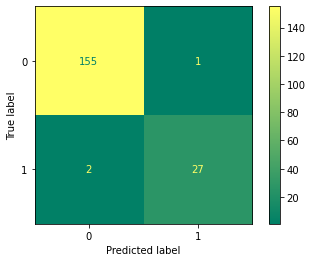

In [84]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(xgbr, X_test, y_test,cmap="summer")  
plt.show()

## Comparing Y-test and Predicted Value

In [85]:
pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred_xgbr})

Actual Value  Predicted Value
248             0                0
365             0                0
432             0                0
610             1                1
132             0                0
..            ...              ...
18              0                0
478             0                0
333             0                0
144             0                0
414             0                0

[185 rows x 2 columns]

In [86]:
np.array(y_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [87]:
y_pred_xgbr

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

## Classification Report for XG Boost
- Having a look at the classification report of XG Boost

In [88]:
from sklearn import metrics

In [89]:
print(metrics.classification_report(y_test, y_pred_xgbr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.96      0.93      0.95        29

    accuracy                           0.98       185
   macro avg       0.98      0.96      0.97       185
weighted avg       0.98      0.98      0.98       185



In [90]:
from sklearn.metrics import precision_score,recall_score,f1_score

xg_precision = precision_score(y_test,y_pred_xgbr)
xg_recall = recall_score(y_test,y_pred_xgbr)
xg_f1 = f1_score(y_test,y_pred_xgbr)
print('Presision Score for XG Boost',xg_precision)
print('Recall Score for XG Boost',xg_recall)
print('F1 Score for XG Boost',xg_f1)

Presision Score for XG Boost 0.9642857142857143
Recall Score for XG Boost 0.9310344827586207
F1 Score for XG Boost 0.9473684210526316


## Comparing the models

In [91]:
com = []
com.append(('Logistic Regression',LogisticRegressionScore1*100,logi_precision*100,logi_recall*100,logi_f1*100))
com.append(('Random Forest',RandomForestClassifierScore1*100,rand_precision*100,rand_recall*100,rand_f1*100))
com.append(('Ada Boost',adaboostscore1*100,ada_precision*100,ada_recall*100,ada_f1*100))
com.append(('XG Boost',xgboostscore1*100,xg_precision*100,xg_recall*100,xg_f1*100))

In [92]:
df = pd.DataFrame(com,columns=['Machine Learning Model','Score','Precision','Recall','F1 Score'])
df

Machine Learning Model      Score   Precision     Recall   F1 Score
0    Logistic Regression  89.729730   85.714286  41.379310  55.813953
1          Random Forest  95.675676  100.000000  72.413793  84.000000
2              Ada Boost  98.378378  100.000000  89.655172  94.545455
3               XG Boost  98.378378   96.428571  93.103448  94.736842

In [93]:
import plotly.express as px

fig = px.bar(df, x='Machine Learning Model', y='Score',
              color='Machine Learning Model',
              color_discrete_sequence=px.colors.qualitative.Plotly,
              height=400, width=800,)

fig.show()

In [94]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 8))

x = np.arange(0, len(df['Machine Learning Model'].index))

plt.bar(x-0.3, df['Score'], width = 0.2,color = '#1D2F6F')
plt.bar(x-0.1, df['Precision'], width = 0.2, color = '#8390FA')
plt.bar(x+0.1, df['Recall'], width = 0.2, color = '#6EAF46')
plt.bar(x+0.3, df['F1 Score'], width = 0.2, color = '#FAC748')

plt.xticks(x,['Logistic Regression','Random Forest','Ada Boost','XG Boost'])

plt.title('Comparison of the models', loc ='center')
plt.legend(['Score','Precision','Recall','F1 score'], loc='upper right', ncol = 4)
plt.show()